In [1]:
from sympy import symbols, sqrt, Piecewise, init_printing, diff, Derivative, latex, lambdify
from sympy.functions import Abs
from sympy.plotting import plot
from matplotlib import pyplot as pl
init_printing(use_unicode=True)
from IPython.display import display, Latex, Math

In [2]:
a = symbols('a') #actual value
p = symbols('p') #predicted value
w = symbols('w') #leaf weight
delta = symbols('delta') #loss function parameter

# Different robust loss functions

In [3]:
def pseudo_huber(delta,a,p):
    return delta**2*(sqrt(1+((a-p)/delta)**2)-1)

def weighted_pseudo_huber(w, delta, a, p):
    return delta**2*(sqrt(1+((a-w*p)/delta)**2)-1)

huber = lambda delta,a,p: Piecewise((0.5*(a-p)**2, Abs(a-p) <= delta), (delta*Abs(a-p)-0.5*delta**2, True))
mae = lambda a,p: Abs(a-p)

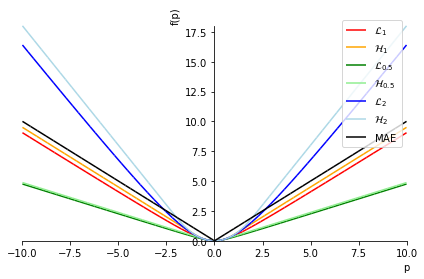

In [4]:
p1 = plot(pseudo_huber(1.0, 0,p), show=False, legend=True, line_color='red')
p1[0].label='$\\mathcal{L}_{1}$'
p05 = plot(pseudo_huber(0.5, 0,p), show=False, line_color='green')
p05[0].label='$\\mathcal{L}_{0.5}$'
p2 = plot(pseudo_huber(2.0, 0,p), show=False, line_color='blue')
p2[0].label='$\\mathcal{L}_{2}$'
h1 = plot(huber(1.0, 0, p), show=False, line_color='orange')
h1[0].label='$\\mathcal{H}_{1}$'
h2 = plot(huber(2.0, 0, p), show=False, line_color='lightblue')
h2[0].label='$\\mathcal{H}_{2}$'
h05 = plot(huber(0.5, 0, p), show=False, line_color='lightgreen')
h05[0].label='$\\mathcal{H}_{0.5}$'
m = plot(mae(0, p), show=False, line_color='black')
m[0].label='$\\mathrm{MAE}$'
p1.extend(h1)
p1.extend(p05)
p1.extend(h05)
p1.extend(p2)
p1.extend(h2)
p1.extend(m)
p1.show()

# Plot quadratic approximations

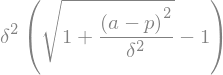

\delta^{2} \left(\sqrt{1 + \frac{\left(a - p\right)^{2}}{\delta^{2}}} - 1\right)


In [5]:
ph = delta**2*(sqrt(1+((a-p)/delta)**2)-1)
display(ph)
print(latex(ph))

### First derivative

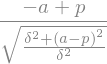

\frac{- a + p}{\sqrt{\frac{\delta^{2} + \left(a - p\right)^{2}}{\delta^{2}}}}


In [6]:
diff1 = ph.diff(p)
display(diff1.simplify())
print(latex(diff1.simplify()))

### Second derivative

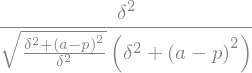

\frac{\delta^{2}}{\sqrt{\frac{\delta^{2} + \left(a - p\right)^{2}}{\delta^{2}}} \left(\delta^{2} + \left(a - p\right)^{2}\right)}


In [7]:
diff2 = ph.diff(p, p)
display(diff2.simplify())
print(latex(diff2.simplify()))

In [8]:
pi = symbols('p_i')
ai = symbols('a_i')


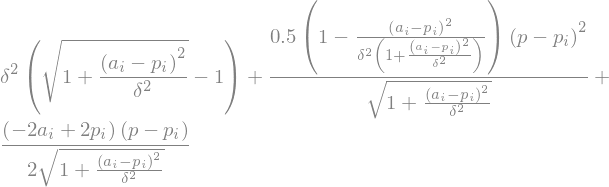

In [9]:
L_T = ph.subs({a:ai,p:pi}) + diff1.subs({a:ai,p:pi})*(p-pi) + 1/2*diff2.subs({a:ai, p:pi})*(p-pi)**2
display(L_T)

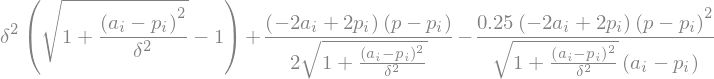

In [10]:
L_D = ph.subs({a:ai,p:pi}) + diff1.subs({a:ai,p:pi})*(p-pi) - 1/2*diff1.subs({a:ai, p:pi})/(ai-pi)*(p-pi)**2
display(L_D)

Let $a_i$ and $p_i$ denote the actual and predicted value of th $i^\mathrm{th}$ example respectively. The true loss is given by

$$L_\delta=\delta^{2} \left(\sqrt{1 + \frac{\left(a - p\right)^{2}}{\delta^{2}}} - 1\right)$$

We'll consider:
1. Taylor expansion of $L_\delta(p)$ about $p_i$:
$$L_\delta^T(p) = \delta^{2} \left(\sqrt{1 + \frac{\left(a_i - p_i\right)^{2}}{\delta^{2}}} - 1\right)
+ \frac{- a_i + p_i}{\sqrt{\frac{\delta^{2} + \left(a_i - p_i\right)^{2}}{\delta^{2}}}}(p-p_i)
+ \frac{\delta^{2}}{2\sqrt{\frac{\delta^{2} + \left(a_i - p_i\right)^{2}}{\delta^{2}}} \left(\delta^{2} + \left(a_i - p_i\right)^{2}\right)} (p-p_i)^2
$$
2. Match value and derivative at $p_i$ and have minimum at $a_i$
$$
L_{\delta}^{\mathrm{D}} = \delta^{2} \left(\sqrt{1 + \frac{\left(a_i - p_i\right)^{2}}{\delta^{2}}} - 1\right)
+ \frac{- a_i + p_i}{\sqrt{\frac{\delta^{2} + \left(a_i - p_i\right)^{2}}{\delta^{2}}}}(p-p_i)
+ \frac{- a_i + p_i}{2\sqrt{\frac{\delta^{2} + \left(a_i - p_i\right)^{2}}{\delta^{2}}}\left(a_i-p_i\right)}(p-p_i)^2
$$

In [11]:
def plot_pi(pival, amin=0):
    Lsub = ph.subs({delta:1.0, a: amin})
    L_Tsub = L_T.subs({delta:1.0, ai: amin, pi:pival})
    L_Dsub = L_D.subs({delta:1.0, ai: amin, pi:pival})
    display(Latex("Values at $p_i$: $$L_1 = {:.3f}\\, L_1^T = {:.3f}\\, L_1^D = {:.3f}$$"
                  .format(float(Lsub.subs({p:pival}).evalf()),
                          float(L_Tsub.subs({p:pival}).evalf()),
                          float(L_Dsub.subs({p:pival}).evalf()),
                         )))
    display(Latex("Values at $a_i$: $$L_1 = {:.3f}\\, L_1^T = {:.3f}\\, L_1^D = {:.3f}$$"
                  .format(float(Lsub.subs({p:amin}).evalf()),
                          float(L_Tsub.subs({p:amin}).evalf()),
                          float(L_Dsub.subs({p:amin}).evalf()),
                         )))
    display(Latex("Derivatives at $p_i$:$$L_1 = {:.3f}\\, L_1^T = {:.3f}\\, L_1^D = {:.3f}$$"
                  .format(float(Lsub.diff(p).subs({p:pival}).evalf()),
                          float(L_Tsub.diff(p).subs({p:pival}).evalf()),
                          float(L_Dsub.diff(p).subs({p:pival}).evalf()),
                         )))
    p1 = plot(Lsub, L_Tsub, L_Dsub, show=False, legend=True, title=r"$p_i={}$".format(pival))
    p1[0].label='$L_{1}$'
    p1[0].line_color='red'
    p1[1].label='$L_{1}^{\mathrm{T}}$'
    p1[1].line_color='blue'
    p1[2].label='$L_{1}^{\mathrm{D}}$'
    p1[2].line_color='green'
    
    p1.show()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

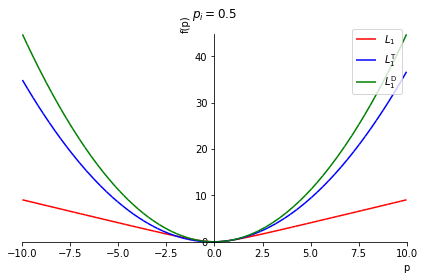

In [12]:
plot_pi(0.5)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

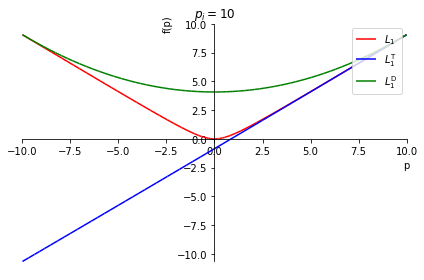

In [13]:
plot_pi(10)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

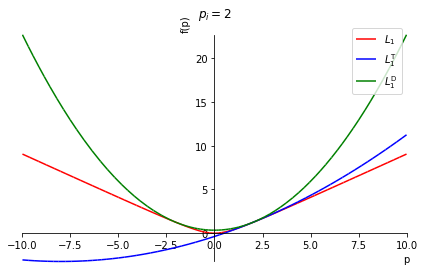

In [14]:
plot_pi(2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

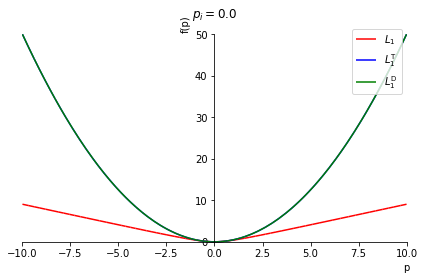

In [15]:
plot_pi(0.0)

# Convergence in XGBoost

In [16]:
import numpy as np
import xgboost as xgb
from typing import Tuple
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets

## Synthetic data

In [17]:
# X = pd.read_csv('data/housesalesprediction/kc_house_data.csv')

# y = np.array(X['price'])

# X.drop(columns=['id', 'date', 'price', 'zipcode', 'lat', 'long', 'sqft_living15',
#        'sqft_lot15'], inplace=True) # the last once just to keep training faster
def make_dataset(number_samples, ratio_outliers, noise_normal, noise_outliers):
    
    X, y = datasets.make_friedman1(int(number_samples*(1-ratio_outliers)), noise=noise_normal)
    X_outliers, y_outliers = datasets.make_friedman1(int(number_samples*ratio_outliers), noise=noise_outliers)
    X = np.concatenate((X, X_outliers))
    y = np.concatenate((y, y_outliers))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    return dtrain, dtest

In [18]:
def phuber(predt: np.ndarray, dtrain: xgb.DMatrix, delta=1.0) -> Tuple[str, float]:
    ''' Mean squared log error metric.'''
    delta = 1.0
    y = dtrain.get_label()
#     predt[predt < -1] = -1 + 1e-6
    elements = delta**2*(np.sqrt(1+np.square((y-predt)/delta))-1)
    return 'Huber', float(np.mean(elements))

def evaluate(gradient, hessian, dtrain, dtest,eta=0.1, lambda_=1.0, num_rounds=20):
    
    def custom_objective(predt: np.ndarray,
                    dtrain: xgb.DMatrix) -> Tuple[np.ndarray, np.ndarray]:
        '''Evaluate using custom objective'''
        grad = gradient(predt, dtrain.get_label())
        hess = hessian(predt, dtrain.get_label())
#         print("Grad norm: {:.2E} Hess norm: {:.2E}".format(np.linalg.norm(grad), np.linalg.norm(hess)))
        return grad, hess
    results = {}

    xgb.train({'tree_method': 'hist', 'seed': 1994,
               'disable_default_eval_metric': 0, 'eta': eta, 'lambda': lambda_},
              dtrain=dtrain,
              num_boost_round=num_rounds,
              obj=custom_objective,
              feval=phuber,
              evals=[(dtrain, 'dtrain'), (dtest, 'dtest')],
              verbose_eval=False,
            evals_result=results)
    return results


def build_gradient_hessian(func, deltaval=1.0):
    gradient = lambda predt, label: np.vectorize(lambdify((pi, ai), func.diff(p).subs({delta:deltaval, p:pi})))(predt, label)
    hessian = lambda predt, label: np.vectorize(lambdify(( pi, ai), func.diff(p, p).subs({delta:deltaval, p:pi})))(predt, label)
    return gradient, hessian

In [35]:
parameters0 = {
"number_samples": 10000,
"ratio_outliers": 0.01,
"noise_normal": 1.0,
"noise_outliers": 100.0,
"deltaval": 1.0,
"eta": 0.1,
"lambda_": 1.0,
"num_rounds": 20
}

In [42]:
def comparison_run(number_samples, ratio_outliers, noise_normal, noise_outliers, deltaval, eta, lambda_, num_rounds):
    gradient_taylor, hessian_taylor = build_gradient_hessian(L_T, deltaval=deltaval)
    gradient_quadratic, hessian_quadratic = build_gradient_hessian(L_D, deltaval=deltaval)
    def gradient_mse(pred,y):
        pred = pred.ravel()
        diff = pred-y
        g = 2.0*diff
        return g

    def hessian_mse(pred, dtrain):
        h = np.ones(pred.shape)*2.0
        return h

    dtrain, dtest = make_dataset(number_samples=number_samples, 
                                 ratio_outliers=ratio_outliers, 
                                 noise_normal=noise_normal, 
                                 noise_outliers=noise_outliers)


    results_taylor = evaluate(gradient=gradient_taylor, hessian=hessian_taylor, dtrain=dtrain, dtest=dtest, 
                              eta=eta, lambda_=lambda_, num_rounds=num_rounds)
    results_quadratic = evaluate(gradient=gradient_quadratic, hessian=hessian_quadratic, dtrain=dtrain, dtest=dtest, 
                              eta=eta, lambda_=lambda_, num_rounds=num_rounds)
    results_mse = evaluate(gradient=gradient_mse, hessian=hessian_mse, dtrain=dtrain, dtest=dtest, 
                              eta=eta, lambda_=lambda_, num_rounds=num_rounds)

    pl.plot(results_mse['dtrain']['Huber'], 'r-', label='MSE train')
    pl.plot(results_mse['dtest']['Huber'], 'r--', label='MSE test')
    pl.plot(results_quadratic['dtrain']['Huber'], 'g-', label='Quadratic train')
    pl.plot(results_quadratic['dtest']['Huber'], 'g--', label='Quadratic test')
    pl.plot(results_taylor['dtrain']['Huber'], 'b-', label='Taylor train')
    pl.plot(results_taylor['dtest']['Huber'], 'b--', label='Taylor test')
    pl.yscale('log')
    pl.ylabel('Huber loss (log)')
    pl.xlabel('Round')
    pl.legend()
    _ = pl.suptitle(r"samples:{number_samples}, outliers:{ratio_outliers}, $\sigma_n$:{noise_normal},$\sigma_o:${noise_outliers}, $\delta$:{deltaval}, $\eta$:{eta}, $\lambda$:{lambda_}".format(
        number_samples = number_samples, ratio_outliers=ratio_outliers, noise_normal=noise_normal, 
        noise_outliers = noise_outliers, deltaval=deltaval, eta=eta, lambda_=lambda_
    ))
    pl.show()

### Different $\eta$

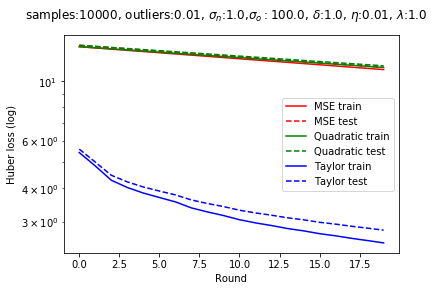

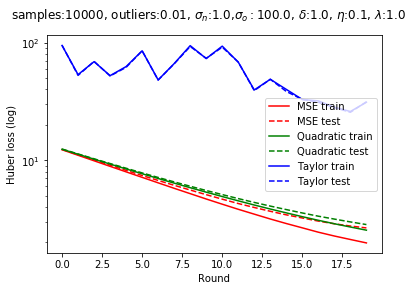

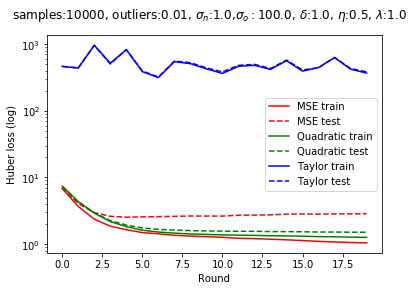

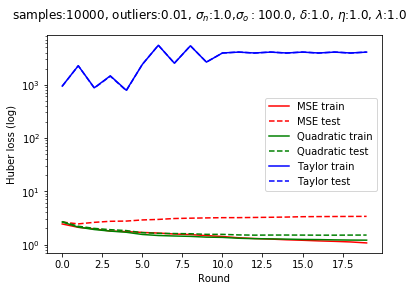

In [43]:
for eta in [0.01, 0.1, 0.5, 1.0]:
    parameters = dict(parameters0)
    parameters['eta'] = eta
    comparison_run(**parameters)

### Different $\lambda$

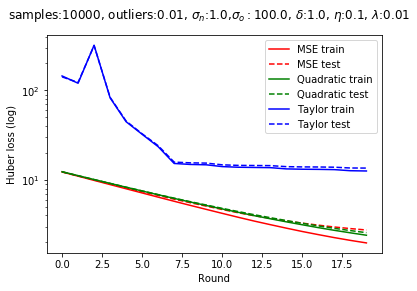

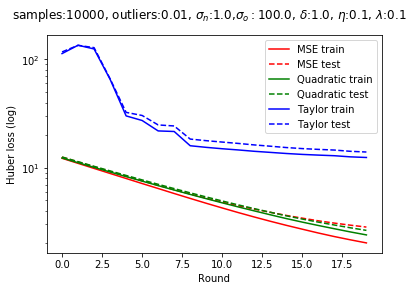

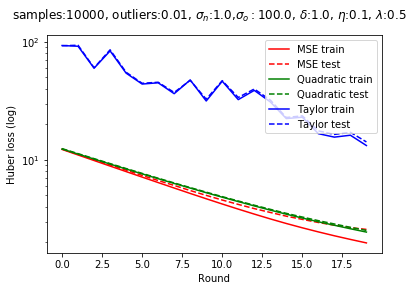

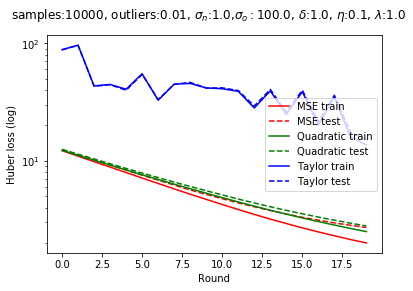

In [44]:
for lambda_ in [0.01, 0.1, 0.5, 1.0]:
    parameters = dict(parameters0)
    parameters['lambda_'] = lambda_
    comparison_run(**parameters)

### Different $\delta$

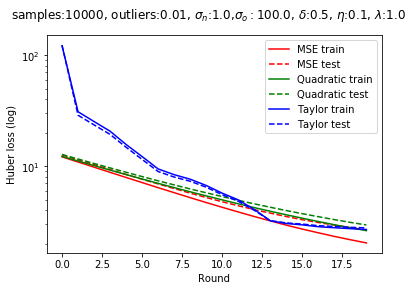

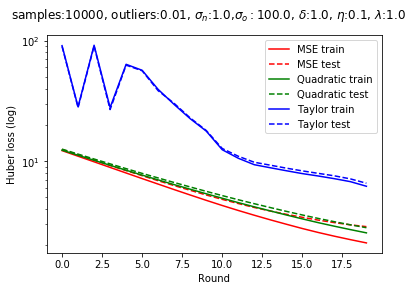

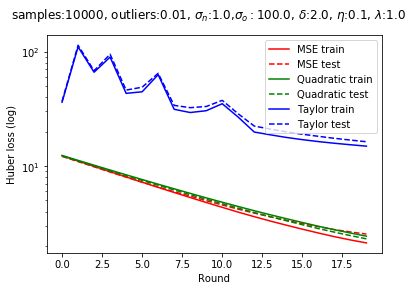

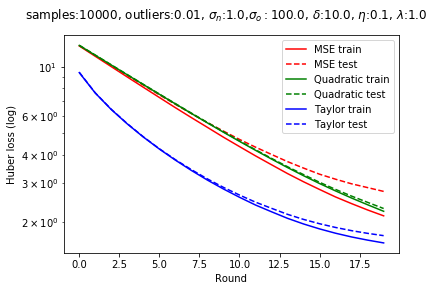

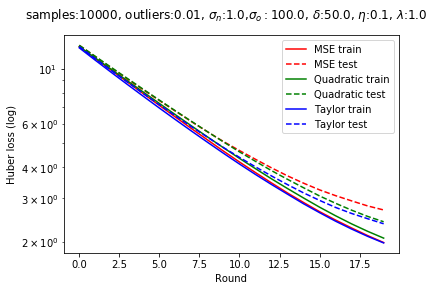

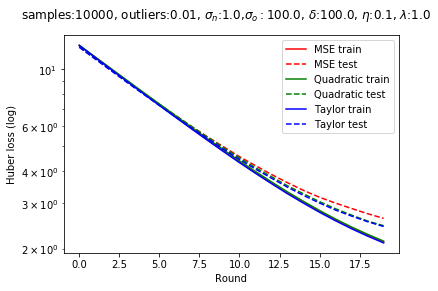

In [46]:
for deltaval in [0.5, 1.0, 2.0, 10.0, 50.0, 100.0]:
    parameters = dict(parameters0)
    parameters['deltaval'] = deltaval
    comparison_run(**parameters)

### Different ratio outliers

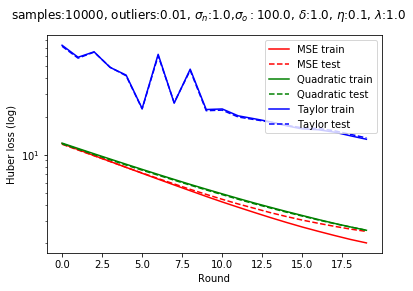

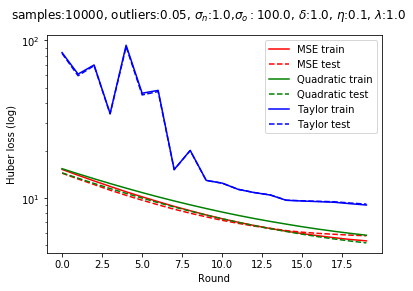

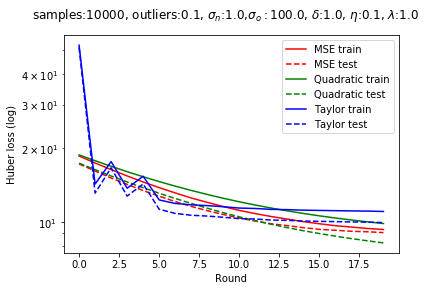

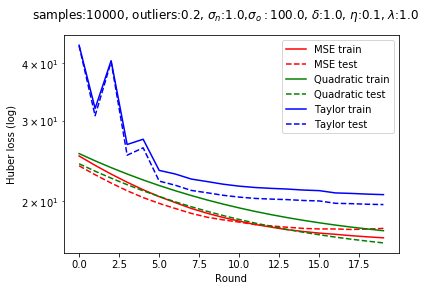

In [47]:
for ratio_outliers in [0.01, 0.05, 0.1, 0.2]:
    parameters = dict(parameters0)
    parameters['ratio_outliers'] = ratio_outliers
    comparison_run(**parameters)

### Different normal noise $\sigma_n$ 

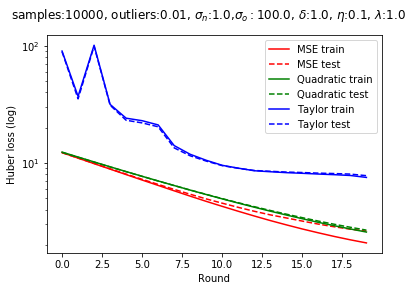

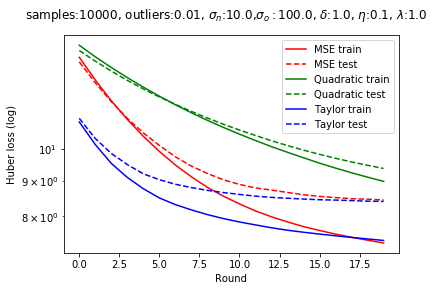

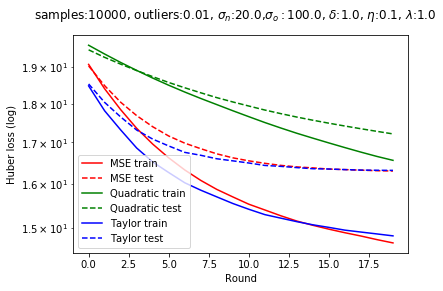

In [48]:
for noise_normal in [1.0, 10.0, 20.0]:
    parameters = dict(parameters0)
    parameters['noise_normal'] = noise_normal
    comparison_run(**parameters)